<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [94]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

#### 2. Connect to the Database


**Install the needed libraries**


In [95]:
#!pip install pandas

In [96]:
#!pip install matplotlib

In [97]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [98]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [99]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [100]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


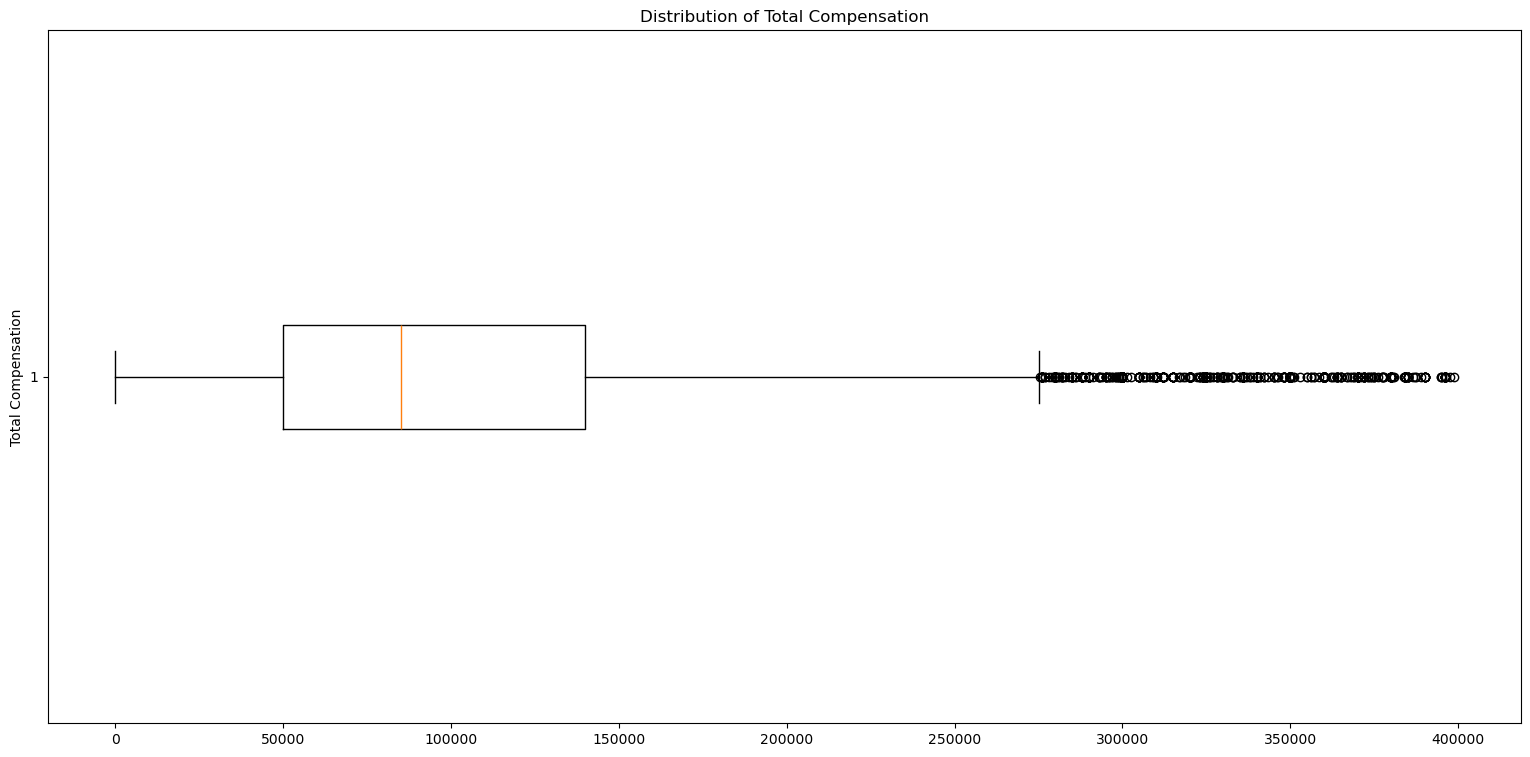

In [101]:
# your code goes here
QUERY = "SELECT CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn).dropna()

#I need to remove the extreme outliers so the data can be more visible
filtered_df = df[df["CompTotal"] < df["CompTotal"].quantile(0.80)]

plt.figure(figsize = (19,9))
plt.boxplot(data = filtered_df, x = "CompTotal", vert = False)
plt.ylabel("Total Compensation")
plt.title("Distribution of Total Compensation")
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


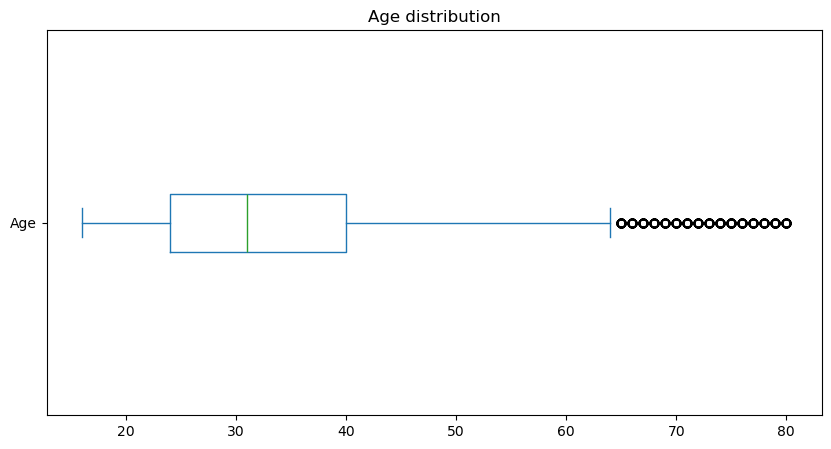

In [102]:
# your code goes here
QUERY = "SELECT Age FROM main"

df = pd.read_sql_query(QUERY, conn)

np.random.seed(42)
def Transformation_Age(Age):
    if Age == "Under 18 years old":
        return np.random.randint(16,18)
    
    elif Age == "18-24 years old":
        return np.random.randint(18,25)
    
    elif Age == "25-34 years old":
        return np.random.randint(25,35)
    
    elif Age == "35-44 years old":
        return np.random.randint(35,45)
    
    elif Age == "45-54 years old":
        return np.random.randint(45,55)
    
    elif Age == "55-64 years old":
        return np.random.randint(55,65)
    
    elif Age == "65 years or older":
        return np.random.randint(65,81)
    
    else:
        return np.random.randint(16,81)
df["Age"] = df["Age"].map(Transformation_Age)

df.plot(kind = "box", vert = False, figsize = (10,5))
plt.title("Age distribution")
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


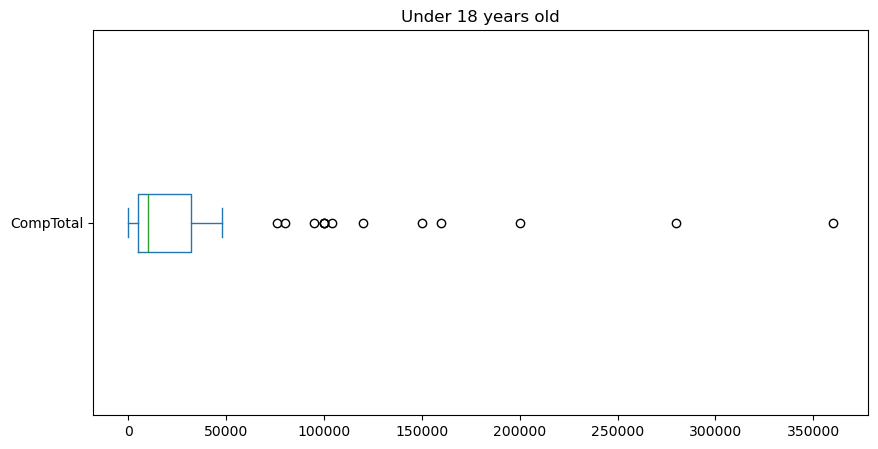

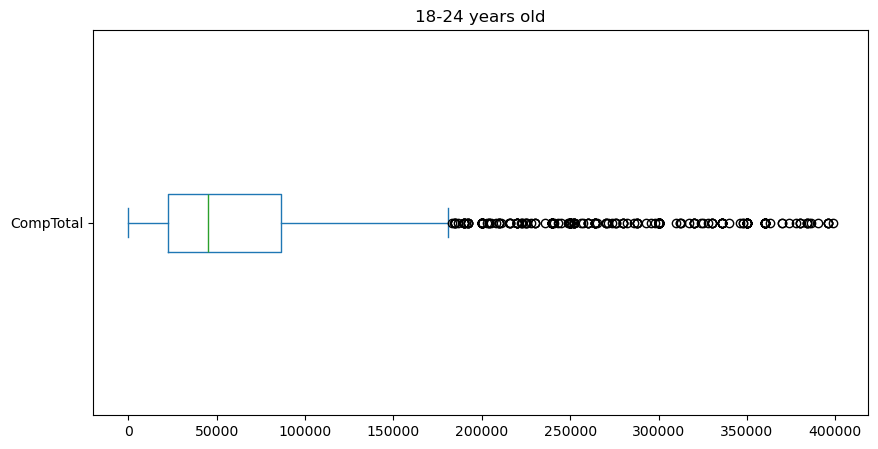

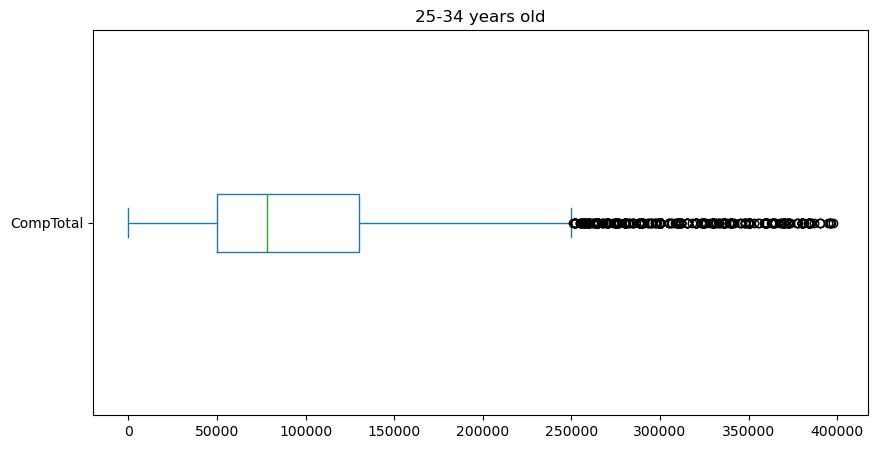

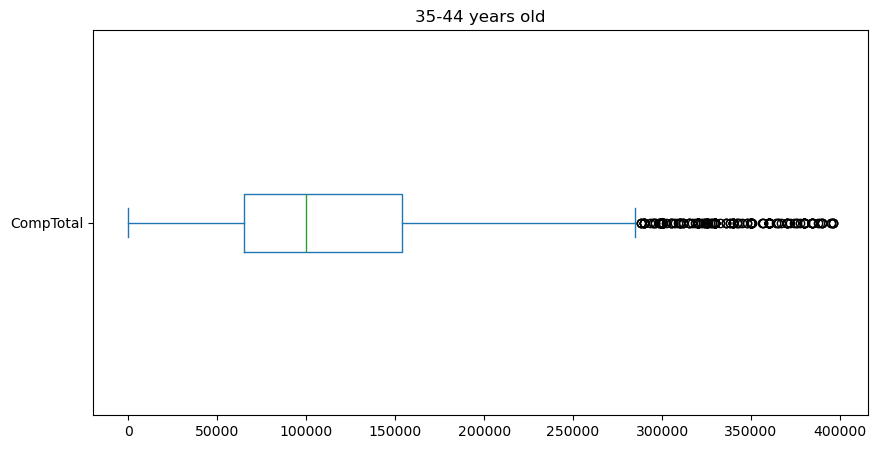

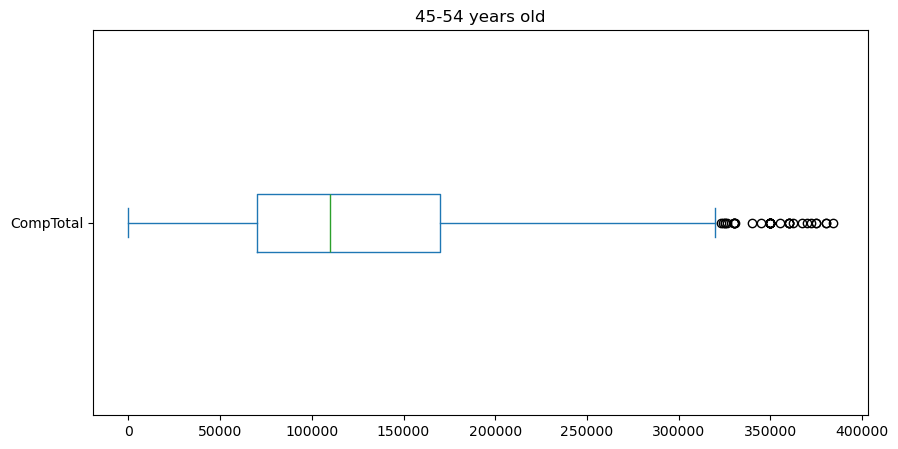

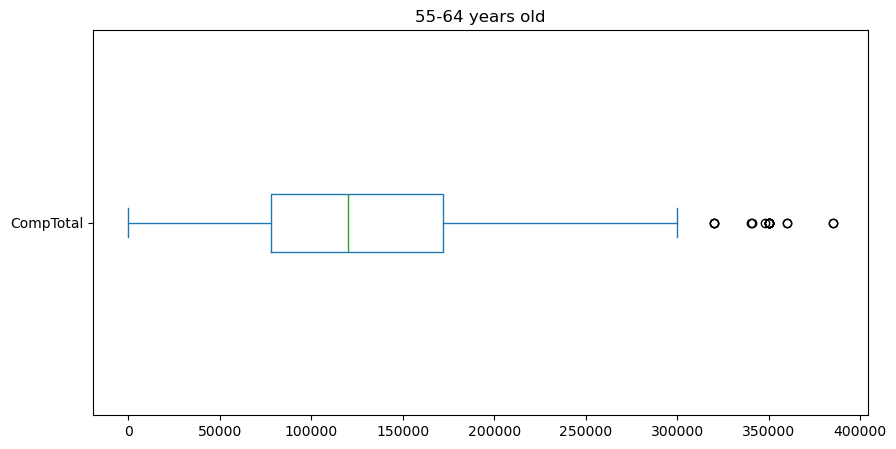

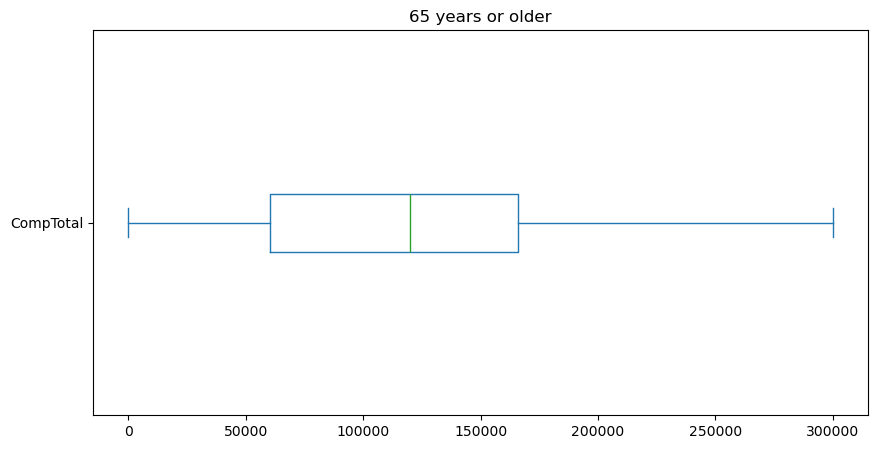

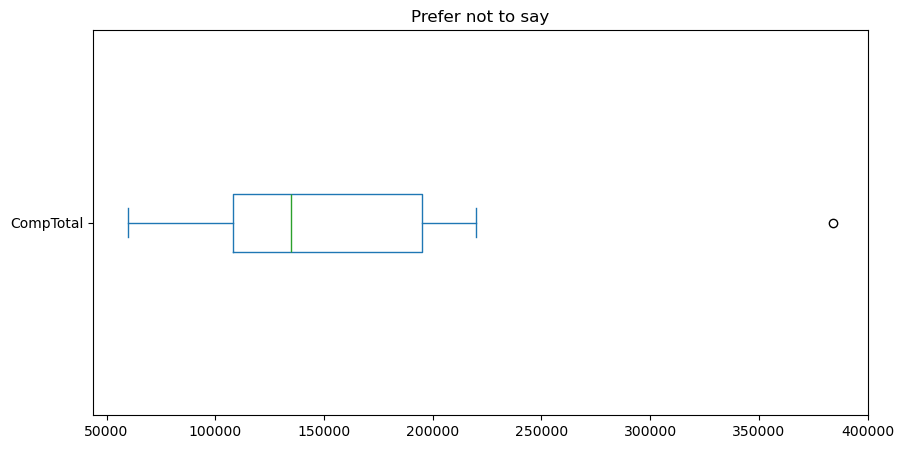

In [103]:
# your code goes here
QUERY = "SELECT AGE, CompTotal FROM main"

'''Unique ages
array(['18-24 years old', '25-34 years old', '35-44 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)'''

df = pd.read_sql_query(QUERY, conn).dropna()

#I need to remove the extreme outliers so the data can be more visible
df = df[df["CompTotal"] < df["CompTotal"].quantile(0.80)]

df_under_18 = df[df["Age"] == "Under 18 years old"]
df_18_to_24 = df[df["Age"] == "18-24 years old"]
df_25_to_34 = df[df["Age"] == "25-34 years old"]
df_35_to_44 = df[df["Age"] == "35-44 years old"]
df_45_to_54 = df[df["Age"] == "45-54 years old"]
df_55_to_64 = df[df["Age"] == "55-64 years old"]
df_65_and_older = df[df["Age"] == "65 years or older"]
df_prefer_not_to_say = df[df["Age"] == "Prefer not to say"]


df_under_18.plot(kind="box", vert=False , figsize = (10,5))
plt.title("Under 18 years old")


df_18_to_24.plot(kind="box", vert=False , figsize = (10,5))
plt.title("18-24 years old")


df_25_to_34.plot(kind="box", vert=False , figsize = (10,5))
plt.title("25-34 years old")


df_35_to_44.plot(kind="box", vert=False , figsize = (10,5))
plt.title("35-44 years old")


df_45_to_54.plot(kind="box", vert=False , figsize = (10,5))
plt.title("45-54 years old")


df_55_to_64.plot(kind="box", vert=False , figsize = (10,5))
plt.title("55-64 years old")


df_65_and_older.plot(kind="box", vert=False , figsize = (10,5))
plt.title("65 years or older")


df_prefer_not_to_say.plot(kind="box", vert=False , figsize = (10,5))
plt.title("Prefer not to say")

plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


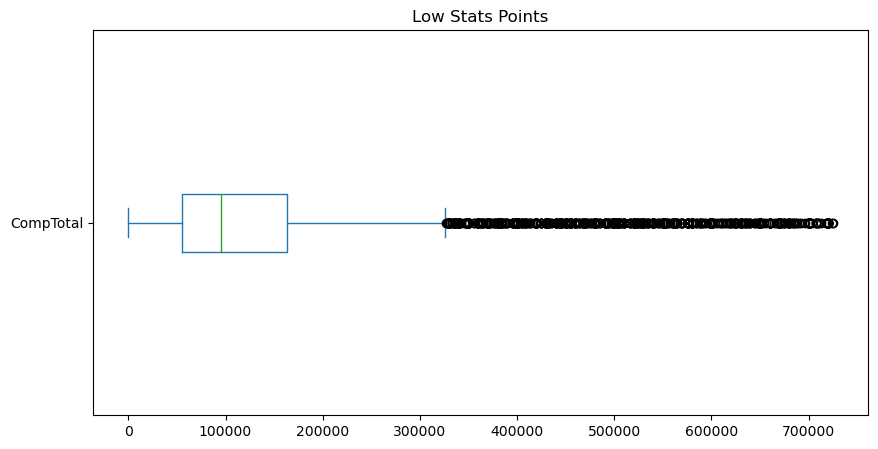

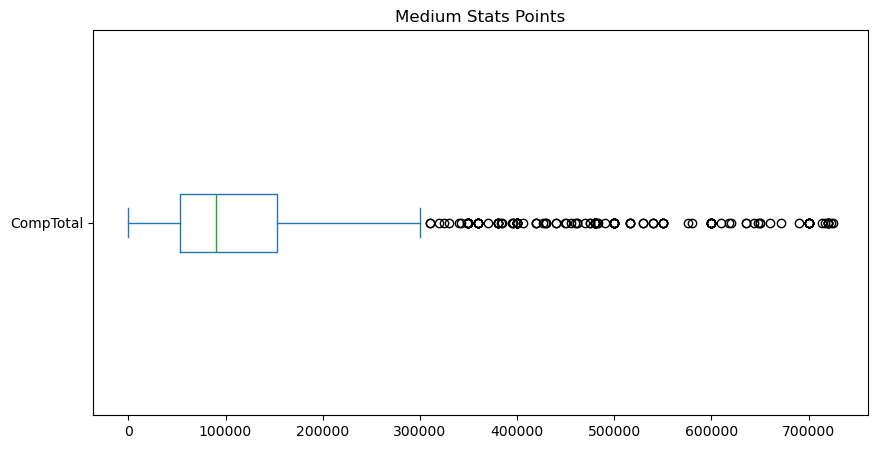

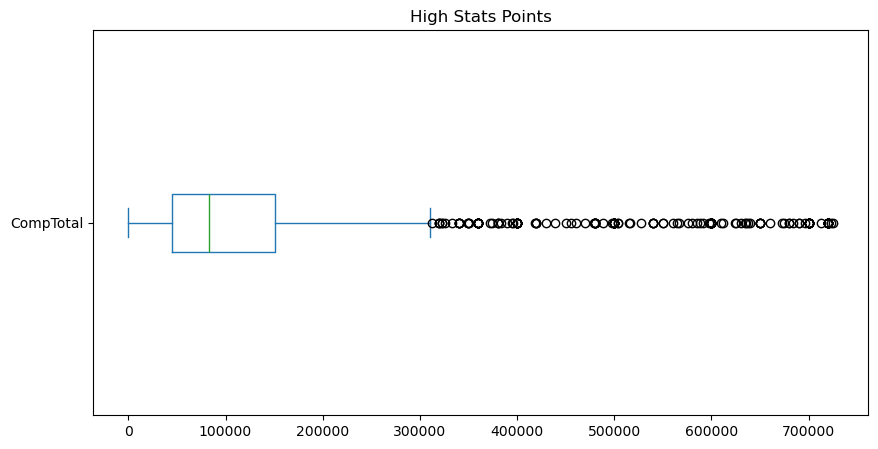

In [104]:
# your code goes here
QUERY = "SELECT JobSatPoints_6, CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn).dropna()

#Removing extreme outliers
df = df[df["CompTotal"] < df["CompTotal"].quantile(0.85)]

def Transformation_JobSat(point):
    if 0 <= point <= 40:
        return "Low"
    if 41 <= point <= 70:
        return "Medium"
    if 71 <= point <= 100:
        return "High"


df["JobSatPoints_6"] = df["JobSatPoints_6"].map(Transformation_JobSat)

df_low = df[df["JobSatPoints_6"] == "Low"]
df_medium = df[df["JobSatPoints_6"] == "Medium"]
df_high = df[df["JobSatPoints_6"] == "High"]

df_low.plot(kind = "box", vert = False, figsize = (10,5))
plt.title("Low Stats Points")

df_medium.plot(kind="box", vert=False, figsize=(10, 5))
plt.title("Medium Stats Points")

df_high.plot(kind="box", vert=False, figsize=(10, 5))
plt.title("High Stats Points")
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1000x500 with 0 Axes>

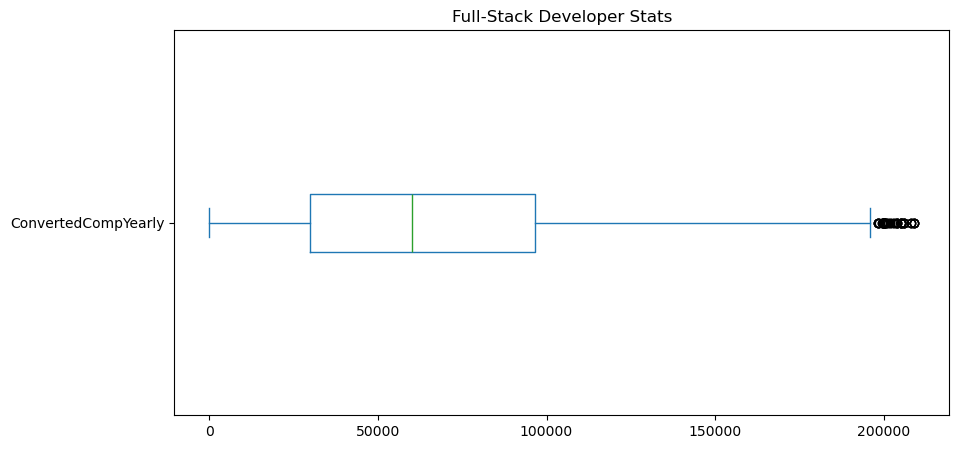

<Figure size 1000x500 with 0 Axes>

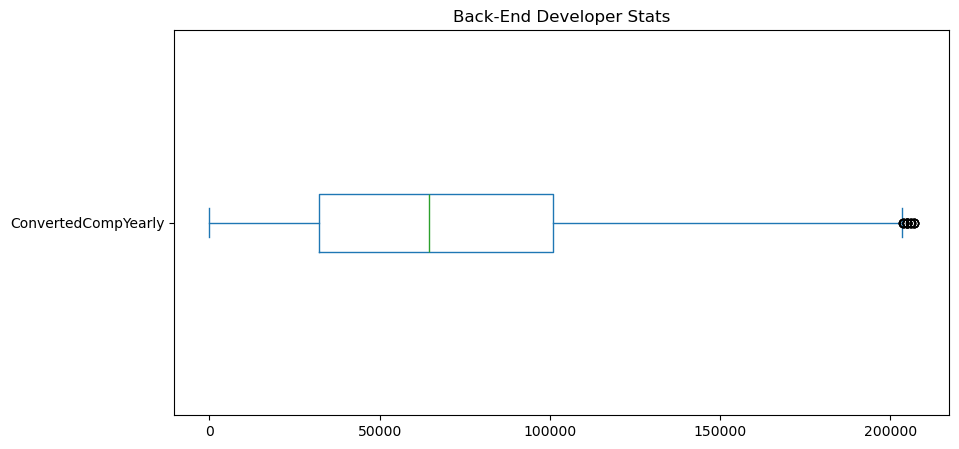

<Figure size 1000x500 with 0 Axes>

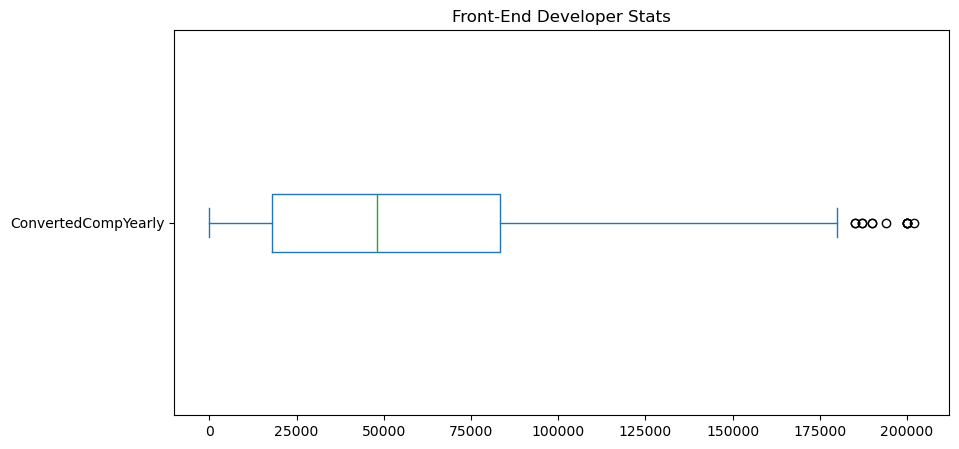

<Figure size 1000x500 with 0 Axes>

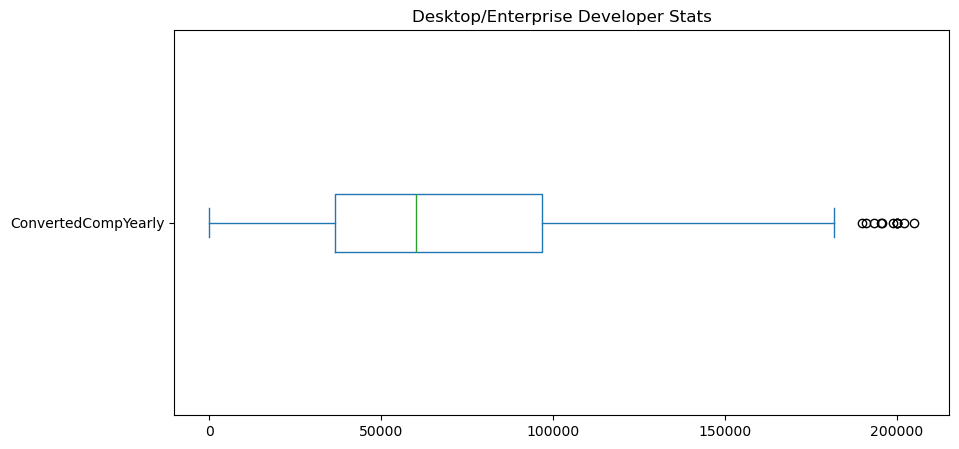

<Figure size 1000x500 with 0 Axes>

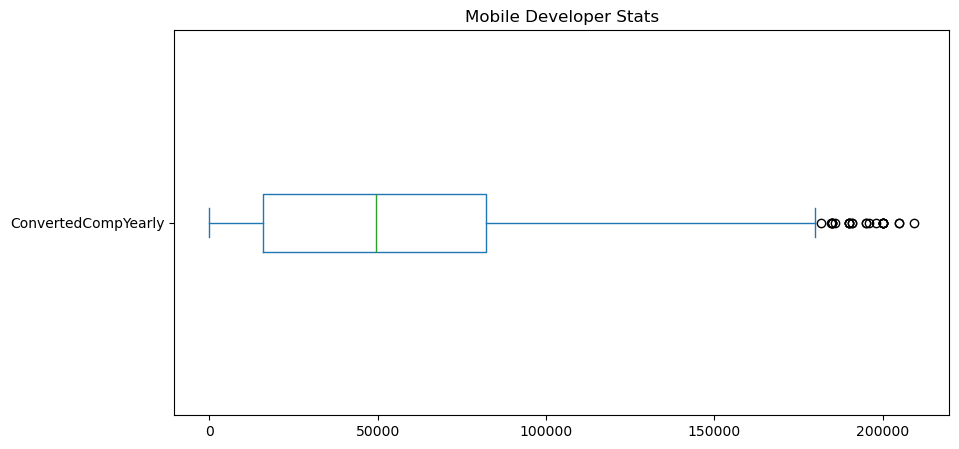

In [ ]:
# your code goes here
QUERY = "SELECT DevType, ConvertedCompYearly FROM main"
df = pd.read_sql_query(QUERY, conn).dropna()

#I need to remove extreme outliers for improved visibility
df = df[df["ConvertedCompYearly"] < df["ConvertedCompYearly"].quantile(0.95)]

top_5_dev = df["DevType"].value_counts(ascending = False)[:5].index.tolist()

df = df[df["DevType"].isin(top_5_dev)]

df_full_stack = df[df["DevType"] == "Developer, full-stack"]
df_back_end = df[df["DevType"] == "Developer, back-end"]
df_front_end = df[df["DevType"] == "Developer, front-end"]
df_desktop = df[df["DevType"] == "Developer, desktop or enterprise applications"]
df_mobile = df[df["DevType"] == "Developer, mobile"]


#I should have done this :) 
#I feel dumb rn -_-
dev_dfs = {
    "Full-Stack": df_full_stack,
    "Back-End": df_back_end,
    "Front-End": df_front_end,
    "Desktop/Enterprise": df_desktop,
    "Mobile": df_mobile}

# Loop through each DataFrame and plot a box plot
for dev_type, df_dev in dev_dfs.items():
    plt.figure(figsize=(10, 5))
    df_dev.plot(kind="box", vert=False, figsize=(10, 5))
    plt.title(f"{dev_type} Developer Stats")
    plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1000x500 with 0 Axes>

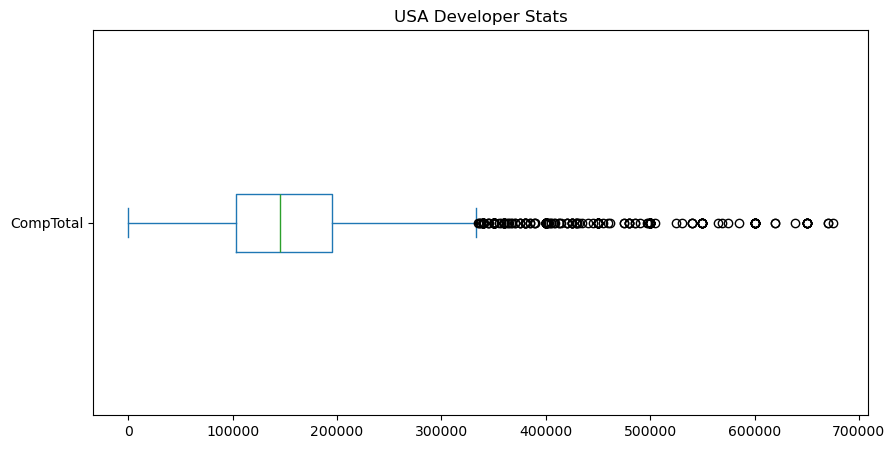

<Figure size 1000x500 with 0 Axes>

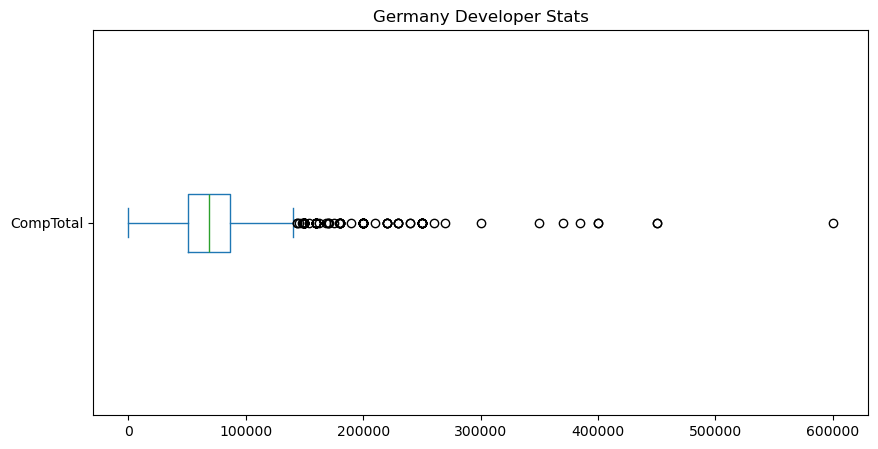

<Figure size 1000x500 with 0 Axes>

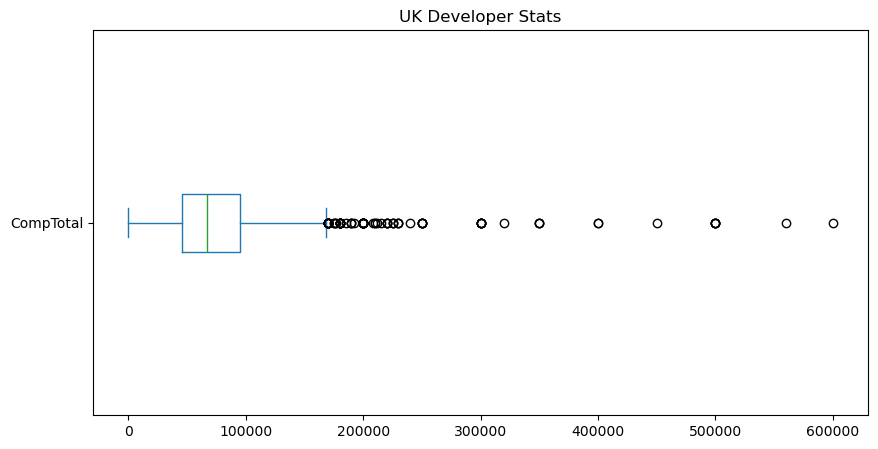

<Figure size 1000x500 with 0 Axes>

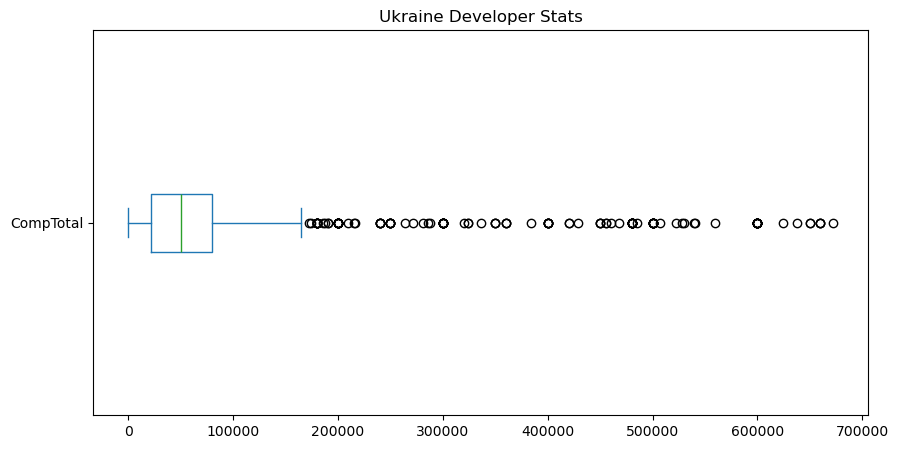

<Figure size 1000x500 with 0 Axes>

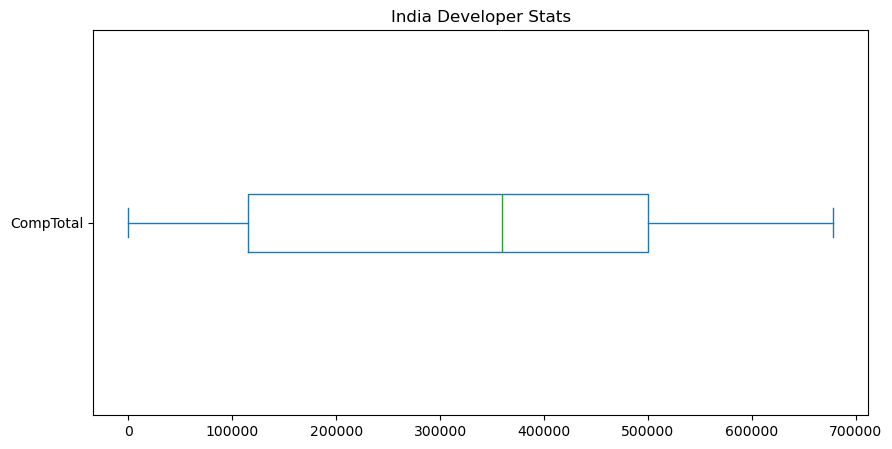

In [ ]:
# your code goes here
QUERY = "SELECT Country, CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn).dropna()

#I need to remove extreme outliers for improved visibility
df = df[df["CompTotal"] < df["CompTotal"].quantile(0.85)]

top_5_countries = df["Country"].value_counts(ascending= False)[:5].index.tolist()
'''['United States of America',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'Ukraine',
 'India']'''

country_dfs = {
    "USA": df[df["Country"] == "United States of America"],
    "Germany": df[df["Country"] == "Germany"],
    "UK": df[df["Country"] == "United Kingdom of Great Britain and Northern Ireland"],
    "Ukraine": df[df["Country"] == "Ukraine"],
    "India": df[df["Country"] == "India"]
}

# Loop through each country DataFrame and plot a box plot
for country, df_country in country_dfs.items():
    df_country.plot(kind="box", vert=False, figsize=(10, 5))
    plt.title(f"{country} Developer Stats")
    plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


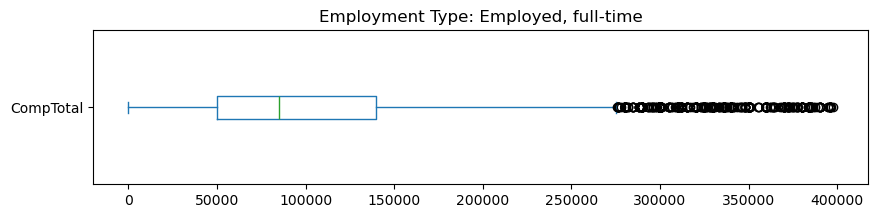

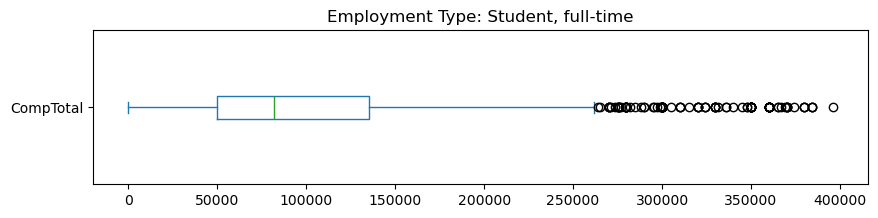

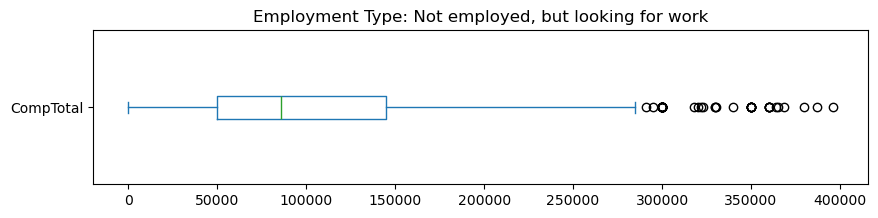

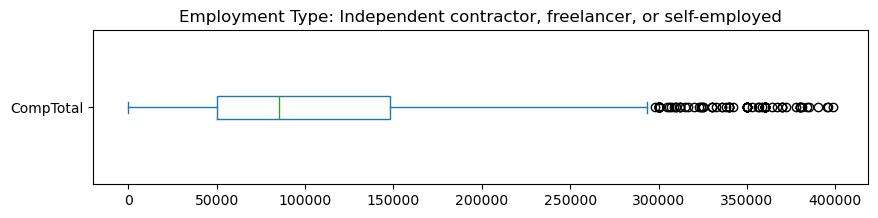

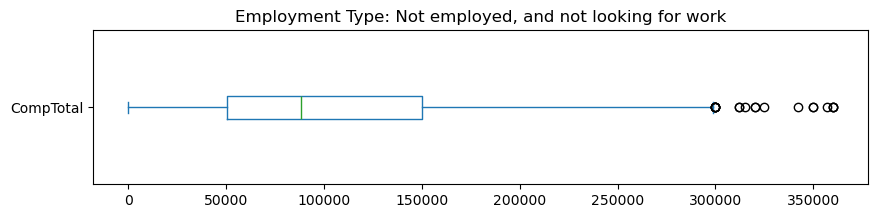

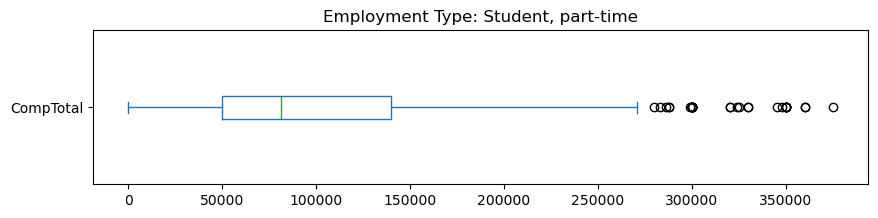

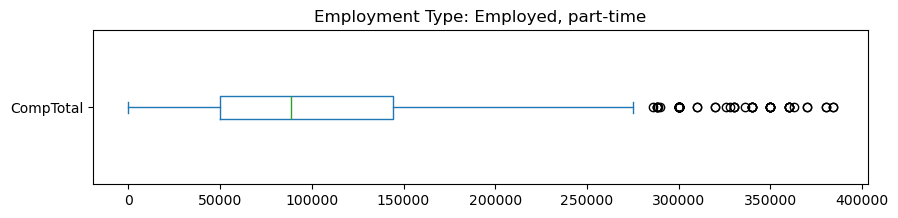

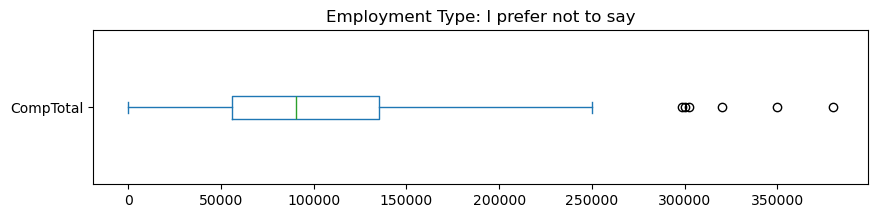

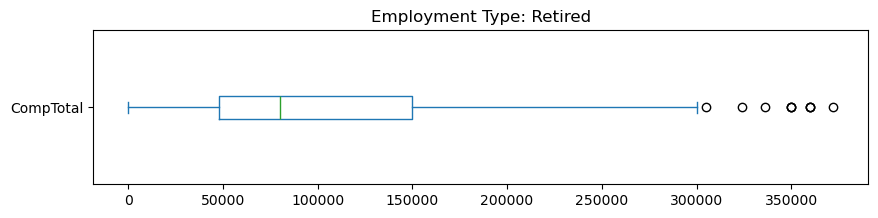

In [164]:
# your code goes here
QUERY = "SELECT Employment, CompTotal FROM main"

df = pd.read_sql_query(QUERY, conn)

df = df.assign(Employment = df["Employment"].str.split(";").explode("Employment"))

df = df[df["CompTotal"] < df["CompTotal"].quantile(0.80)]

employment_dfs = {
    "Employed, full-time": df[df["Employment"] == "Employed, full-time"],
    "Student, full-time": df[df["Employment"] == "Student, full-time"],
    "Not employed, but looking for work": df[df["Employment"] == "Not employed, but looking for work"],
    "Independent contractor, freelancer, or self-employed": df[df["Employment"] == "Independent contractor, freelancer, or self-employed"],
    "Not employed, and not looking for work": df[df["Employment"] == "Not employed, and not looking for work"],
    "Student, part-time": df[df["Employment"] == "Student, part-time"],
    "Employed, part-time": df[df["Employment"] == "Employed, part-time"],
    "I prefer not to say": df[df["Employment"] == "I prefer not to say"],
    "Retired": df[df["Employment"] == "Retired"]}

for employment, df_employment in employment_dfs.items():
    df_employment.plot(kind = "box", vert = False,figsize = (10,2))
    plt.title(f"Employment Type: {employment}")
    plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


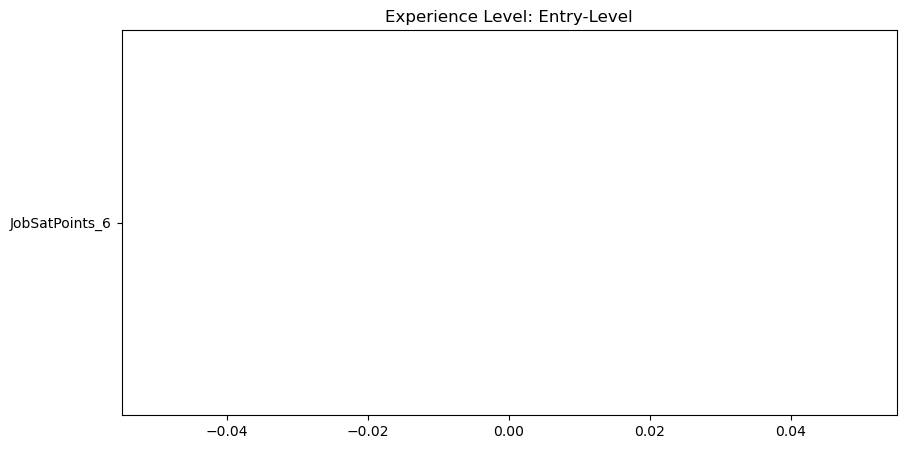

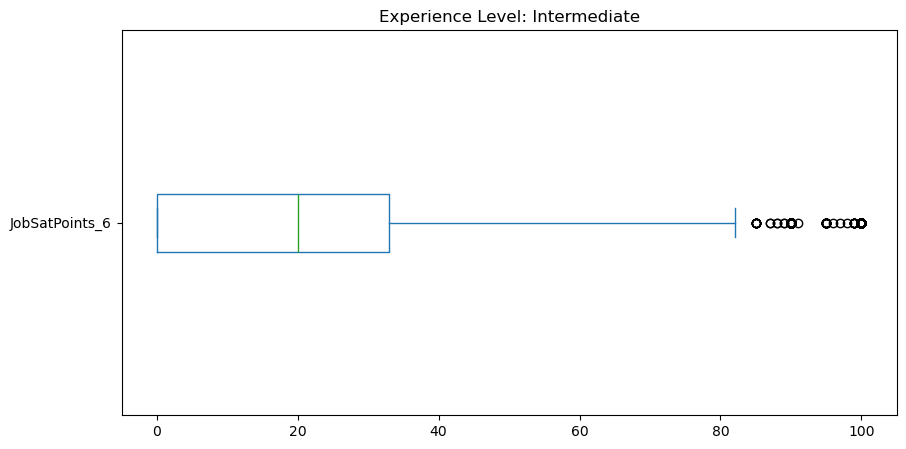

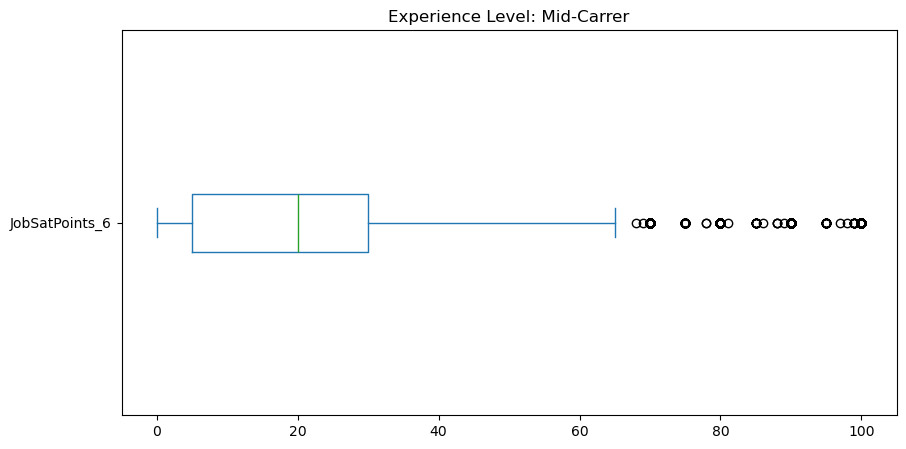

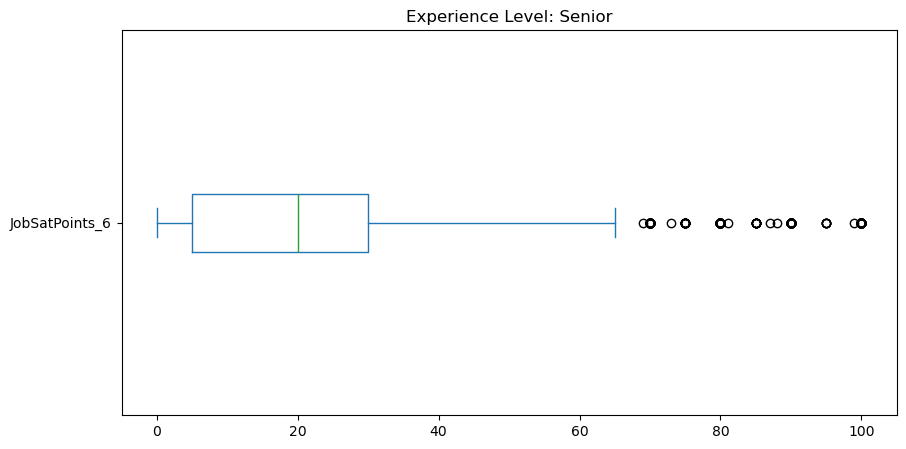

In [172]:
# your code goes here
QUERY = "SELECT YearsCodePro, JobSatPoints_6 FROM main"

df = pd.read_sql_query(QUERY, conn).dropna()


df["YearsCodePro"] = df["YearsCodePro"].replace({"Less than 1 year":"0",
                                                "More than 50 years":"51"})

def map_experience_level(years):
    if int(years) in range(0, 4):
        return "Entry-Level"
    elif int(years) in range(4, 7):
        return "Intermediate"
    elif int(years) in range(7, 16):
        return "Mid-Career"
    else:
        return "Senior"


df["YearsCodePro"] = df["YearsCodePro"].map(map_experience_level)

experience_dfs = {"Entry-Level":df[df["YearsCodePro"] == "Entry_Level"],
                "Intermediate": df[df["YearsCodePro"] == "Intermediate"],
                "Mid-Carrer": df[df["YearsCodePro"] == "Mid-Career"],
                "Senior": df[df["YearsCodePro"] == "Senior"]}

for experience, experience_df in experience_dfs.items():
    experience_df.plot(kind = "box", vert = False, figsize = (10,5))
    plt.title(f"Experience Level: {experience}")
    plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [173]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
